# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


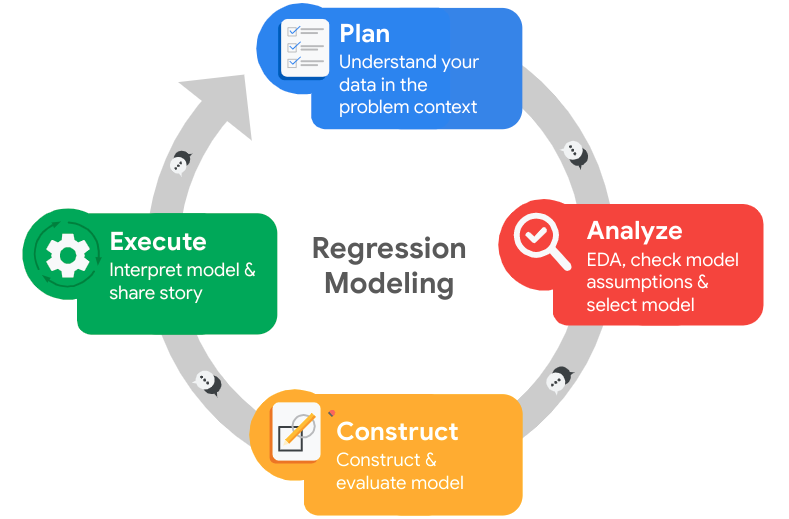

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [83]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [84]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'number_project':'number_of_projects','time_spend_company':'tenure'},inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns=df0.columns.str.lower()
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
filt=df0.duplicated()
df0[filt].head(5)

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

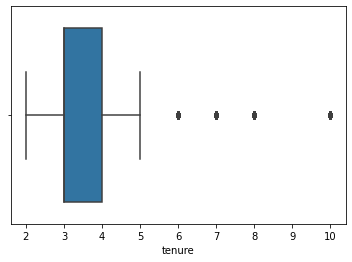

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df1,x=df1['tenure'])



In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

percentile75=df1['tenure'].quantile(0.75)
percentile25=df1['tenure'].quantile(0.25)
iqr=percentile75 - percentile25
upper_limit= percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
print('upper limit ',upper_limit)
print('lower limit ',lower_limit)
outliers=df1[(df1['tenure']> upper_limit)| (df1['tenure']<lower_limit)]
print('number of outliers ',len(outliers))

upper limit  5.5
lower limit  1.5
number of outliers  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

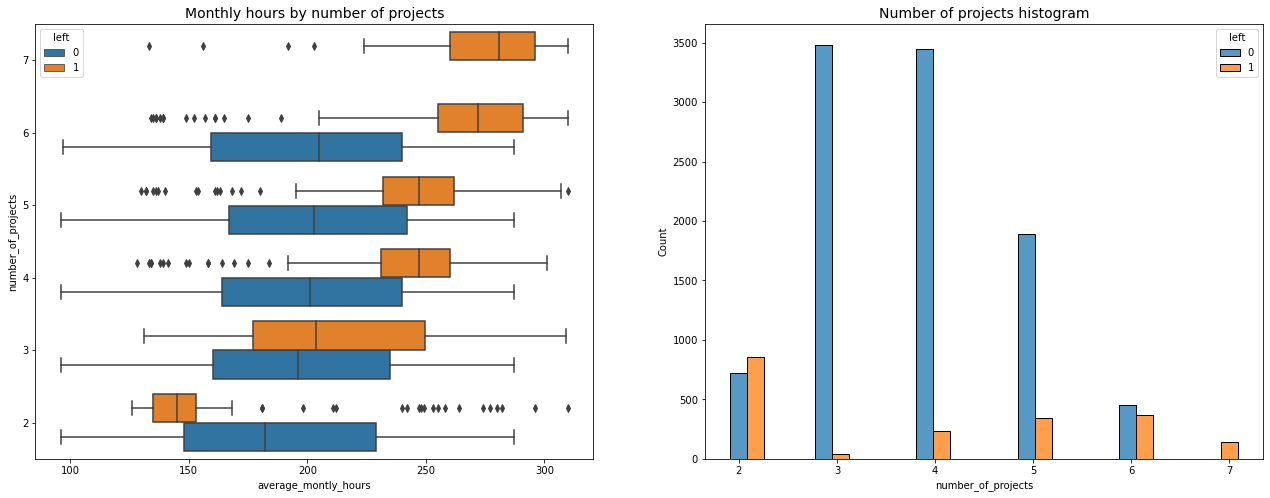

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_montly_hours', y='number_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_of_projects']
tenure_left = df1[df1['left']==1]['number_of_projects']
sns.histplot(data=df1, x='number_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

df1[df1['number_of_projects']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

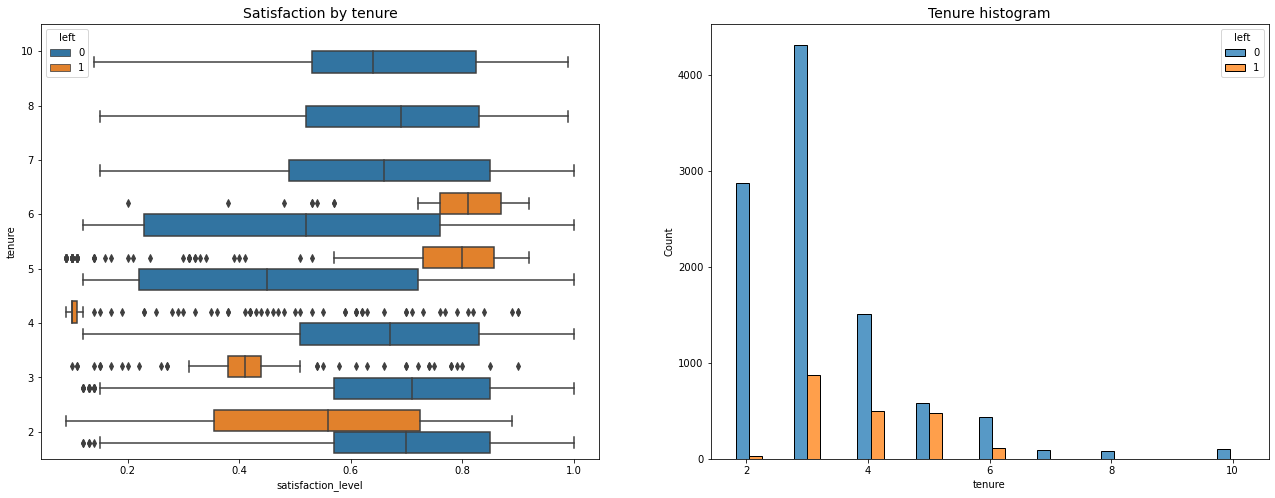

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
df1[df1['department']=='technical']['left'].value_counts()

0    1854
1     390
Name: left, dtype: int64

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
df1[df1['department']=='sales']['left'].value_counts()

0    2689
1     550
Name: left, dtype: int64

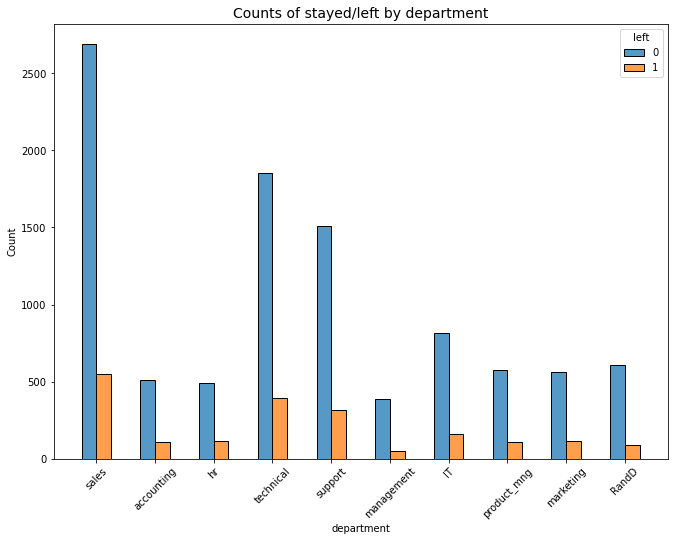

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###plt.figure(figsize=(11,8))
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


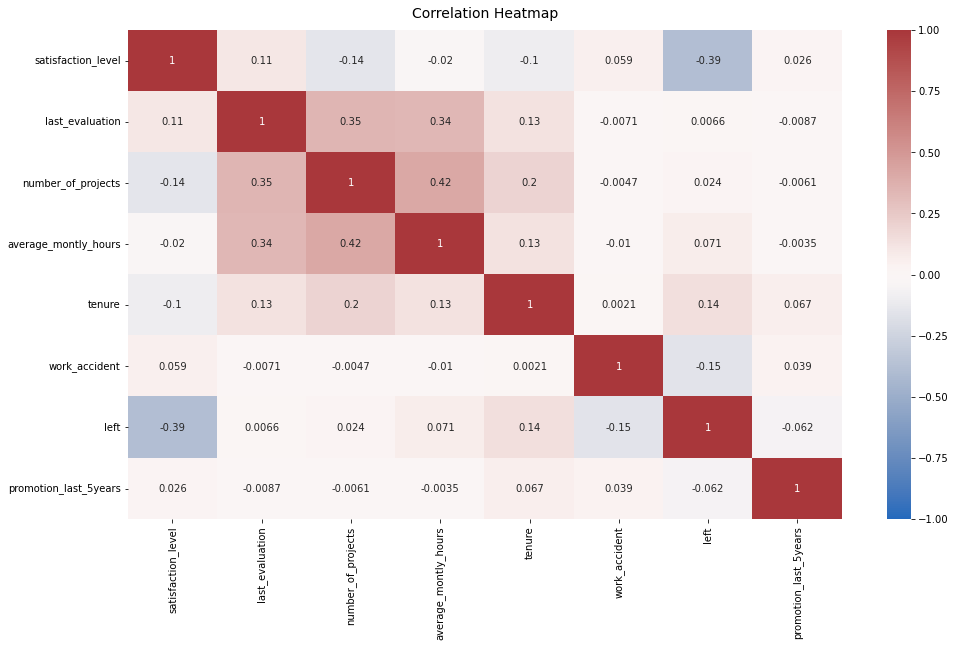

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [1]:
### YOUR CODE HERE ###
df1['salary'].value_counts()
df2=pd.get_dummies(df1,drop_first=False)
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.show()

NameError: name 'df1' is not defined

In [23]:
cleaned=df2[(df1['tenure']>=lower_limit)& (df2['tenure']<=upper_limit)]
cleaned=df2.drop(columns=['work_accident','last_evaluation'])
cleaned.shape

(11991, 19)

In [24]:
y=cleaned['left']
X=cleaned.drop('left',axis=1)
X.dtypes

satisfaction_level        float64
number_of_projects          int64
average_montly_hours        int64
tenure                      int64
promotion_last_5years       int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25,stratify=y, random_state=42)

In [26]:
lr=LogisticRegression(max_iter=500,random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred=lr.predict(X_test)

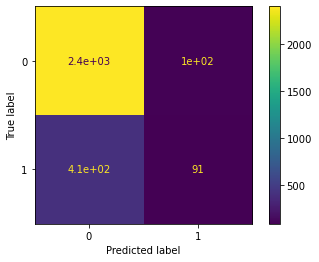

In [28]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=lr.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

In [29]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.96      0.90      2500
    Predicted would leave       0.47      0.18      0.26       498

                 accuracy                           0.83      2998
                macro avg       0.66      0.57      0.58      2998
             weighted avg       0.79      0.83      0.80      2998



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [30]:
#decision trees
y=cleaned['left']
X=cleaned.drop('left',axis=1)


In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [32]:
tree=DecisionTreeClassifier(random_state=42)
cv_params={'max_depth':[10,50],
           'min_samples_leaf':[2,4,6],
           'min_samples_split':[2,5,6]
    
}

In [33]:
scoring={'accuracy','precision','recall','f1','roc_auc'}

In [34]:
tree1=GridSearchCV(tree,cv_params,scoring=scoring,cv=4, refit='f1')

In [35]:
%%time
tree1.fit(X_train,y_train)

CPU times: user 1.5 s, sys: 72.6 ms, total: 1.57 s
Wall time: 1.57 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 50], 'min_samples_leaf': [2, 4, 6],
 

In [36]:
#check best parameters
tree1.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [37]:
tree1.best_score_

0.9331315551665305

In [38]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [39]:
#get scores
y_pred=tree1.predict(X_test)
print('accuracy ',metrics.accuracy_score(y_test,y_pred))
print('recall ', metrics.recall_score(y_test,y_pred))
print('precision ', metrics.precision_score(y_test,y_pred))

accuracy  0.9827682045580878
recall  0.9262981574539364
precision  0.968476357267951


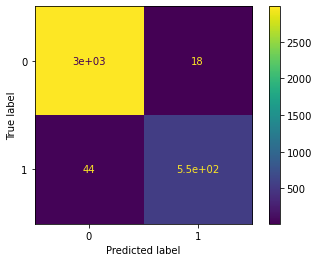

In [40]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred, labels=tree1.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree1.classes_)
disp.plot()

In [41]:
#constructing a random forest
rf=RandomForestClassifier(random_state=42)
cv_params={'n_estimators':[100,500],
           'max_depth':[10,50],
           'min_samples_leaf':[2,4,6],
           'max_features':[3],
           'min_samples_split':[2,4,6],
           'max_samples':[0.7,1.0]
    
}
scoring={'accuracy','recall','precision','f1'}


In [42]:
rf1=GridSearchCV(rf,cv_params, scoring=scoring,cv=4,refit='f1')

In [43]:
%%time
rf1.fit(X_train,y_train)

CPU times: user 2min 11s, sys: 2.54 s, total: 2min 14s
Wall time: 2min 14s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [44]:
rf1.best_score_

0.9241950651315348

In [45]:
rf1.best_params_

{'max_depth': 50,
 'max_features': 3,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [46]:
#modelevaluation
y_pred=rf1.predict(X_test)
print('recall ',metrics.recall_score(y_test,y_pred))
print('accuracy ',metrics.accuracy_score(y_test,y_pred))
print('precision ',metrics.precision_score(y_test,y_pred))
print('f1 score',metrics.f1_score(y_test,y_pred))

recall  0.9128978224455612
accuracy  0.9813785436353529
precision  0.9732142857142857
f1 score 0.9420916162489196


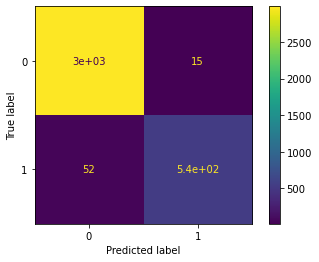

In [47]:
#confusion matrix display
cm=metrics.confusion_matrix(y_test,y_pred,labels=rf1.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf1.classes_)
disp.plot()

In [48]:
#feature engineering to improve models perfomance
df3=cleaned.drop('satisfaction_level',axis=1)

df3.head()

,number_of_projects,average_montly_hours,tenure,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
df3['overworked'] = np.where(df3['average_montly_hours']> 175,1,0)
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [50]:
df3=df3.drop('average_montly_hours', axis=1)


In [51]:
#decision tree round 2
y=df3['left']
X=df3.drop('left',axis=1)

In [52]:
X_train, X_test, y_train ,y_test=train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [53]:
tree=DecisionTreeClassifier(random_state=42)

In [54]:
cv_params={
           'min_samples_split':[2,4,6],
           'min_samples_leaf':[2,5,7],
           'max_depth':[5,10]
    
    
}
scoring={'accuracy','precision','recall','f1'}

In [55]:
tree2=GridSearchCV(tree,cv_params, scoring=scoring,cv=4, refit='f1')

In [56]:
tree2.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2, 5, 7],
  

In [57]:
tree2.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [58]:
tree2.best_score_

0.8108518036108657

In [59]:
#model evaluation
y_pred=tree2.predict(X_test)
print('Accuracy ',metrics.accuracy_score(y_test,y_pred))
print('Recall ',metrics.recall_score(y_test,y_pred))
print('Precision ',metrics.precision_score(y_test,y_pred))
f1=metrics.f1_score(y_test,y_pred)

if f1>0.8:
    print('This model is pretty good with an F1 score of ',f1)
else:
    print('Not good')

Accuracy  0.9460811561978877
Recall  0.8726968174204355
Precision  0.8153364632237872
This model is pretty good with an F1 score of  0.8430420711974109


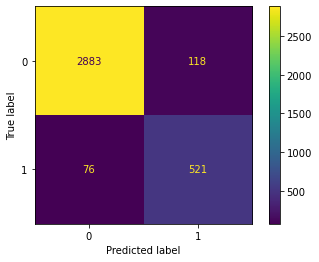

In [60]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=tree2.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree2.classes_)
disp.plot(values_format='')

In [61]:
#Random Forest Round 2
rf=RandomForestClassifier(random_state=0)

In [62]:
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
scoring={'recall','accuracy','precision','f1'}

In [63]:
rf2=GridSearchCV(rf,cv_params,cv=4,scoring=scoring, refit='f1')

In [64]:
%%time
rf2.fit(X_train,y_train)

CPU times: user 5min 28s, sys: 1.68 s, total: 5min 29s
Wall time: 5min 29s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [65]:
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [66]:
rf2.best_score_

0.8159893477309208

In [71]:
print('precision ',metrics.precision_score(y_test,y_pred))

precision  0.8152866242038217


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [67]:
y_pred=rf2.predict(X_test)

In [68]:
#evaluation metrics
print('recall ', metrics.recall_score(y_test,y_pred))
print('accuracy ',metrics.accuracy_score(y_test,y_pred))
print('precision ',metrics.precision_score(y_test,y_pred))
print('f1',metrics.f1_score(y_test,y_pred))

recall  0.8576214405360134
accuracy  0.9441356309060589
precision  0.8152866242038217
f1 0.8359183673469388


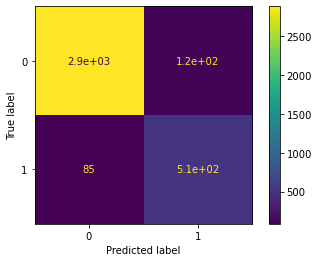

In [69]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=rf2.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf2.classes_)
disp.plot()

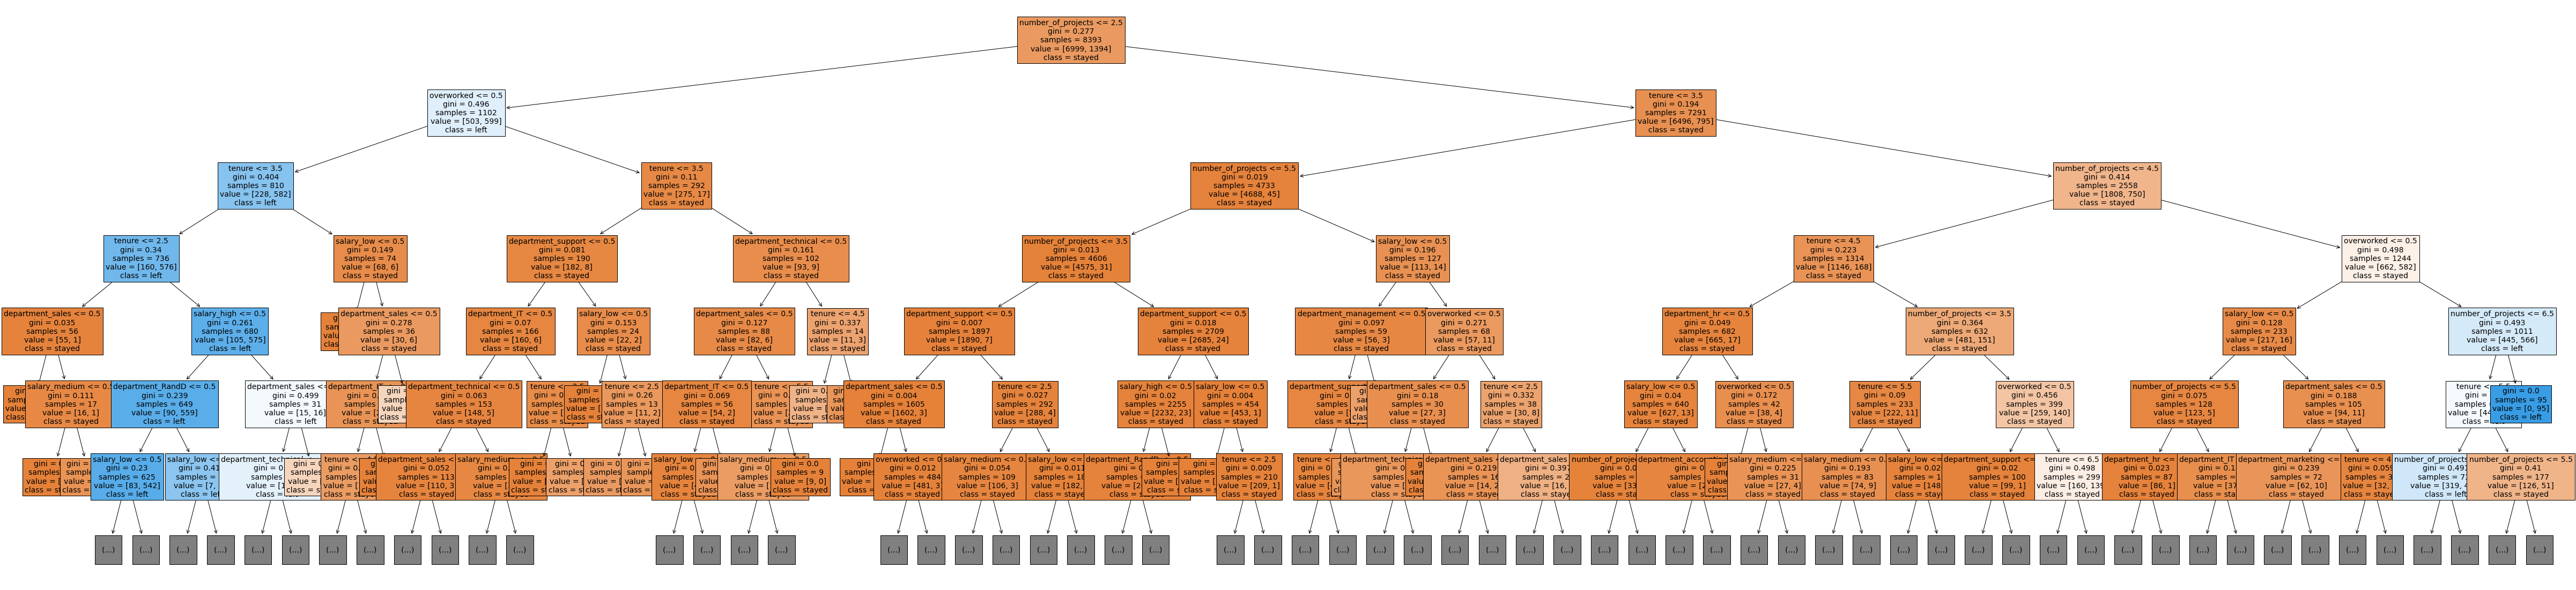

In [70]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [87]:
tree2_importances=pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'],index=X.columns)
tree2_importances=tree2_importances.sort_values(by='gini_importance',ascending=False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_of_projects,0.389938
tenure,0.375891
overworked,0.197089
salary_high,0.016217
department_sales,0.004776
salary_medium,0.003519
salary_low,0.003421
department_RandD,0.002406
department_technical,0.001718
department_support,0.001475


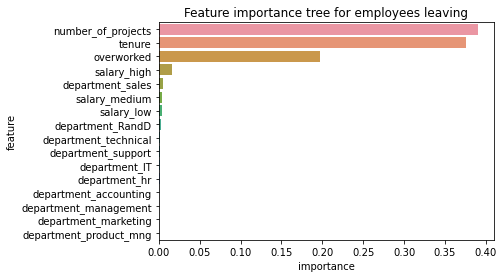

In [90]:
sns.barplot(data=tree2_importances,x='gini_importance',y=tree2_importances.index,orient='h')
plt.title('Feature importance tree for employees leaving')
plt.ylabel('feature')
plt.xlabel('importance')
plt.show()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.